# Week 2 - Implementation of Shaffer et al

In [2]:
# This line tells matplotlib to include plots here
%matplotlib inline
import numpy as np # We'll need numpy later
from scipy.stats import kstest, ttest_ind, ks_2samp, zscore
import matplotlib.pyplot as plt # This lets us access the pyplot functions

## (1) Estimation of a sample mean from a normally distributed variable.

Let us assume that a true distribution of a process is described by the normal distribution with $\mu=5$ and $\sigma=1$. You have a measurement technique that allows you to sample n points from this distribution. In Python we can use a random number generator whose numbers will be chosen from the desired normal distribution by using the function `np.random.normal`. Sample from this normal distribution from n=1 to 50 (i.e. n=1:50). Create a plot for the standard deviation of the calculated mean from each n when you repeat the sampling 1000 times each. (i.e. You will repeat your n observations 1000 times and will calculate the sample mean for each of the 1000 trials).

Text(0, 0.5, 'Standard Deviation of the Mean')

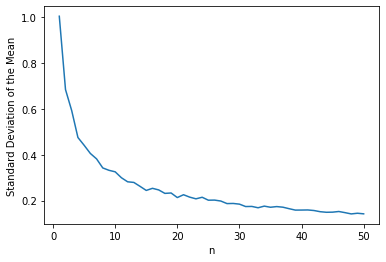

In [3]:
# Initial code here
b = np.zeros([1000,50])
sdev = np.zeros([50,1])
for n in range(0,50):    
    for i in range(0,1000):
        a = np.random.normal(5,1,n+1) 
        b[i][n] = np.mean(a)
    sdev[n] = np.std(b[:,n]) #b is the sample mean

n = np.arange(1, 51)
plt.plot(n, sdev)
plt.xlabel("n")
plt.ylabel("Standard Deviation of the Mean")

#### 1a. Plot the standard deviation of the sample mean versus n. Add a second line which is 1/sqrt(n). Describe what this tells you about the relationship between n and your power to estimate the underlying mean.

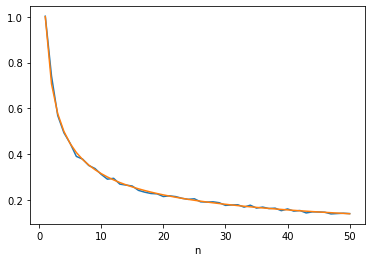

In [5]:
# Answer to 1a here
import math
plt.plot(n,sdev)
plt.xlabel("n")

k = np.zeros(50)
for j in range(0,50):
    k[j] = 1/math.sqrt(j+1)
n = np.arange(1, 51)
plt.plot(n, k)


The relationship is that they both follow the same function.

#### 1b. Plot the boxplot for the sample means for all values n. Using words, interpret what the boxplot view of the 1000 trials for n=1 means and what the trends in the boxplot demonstrate compared to the plot in 1a (I.e. What information do you gain or lose in the two different plotting schemes)?

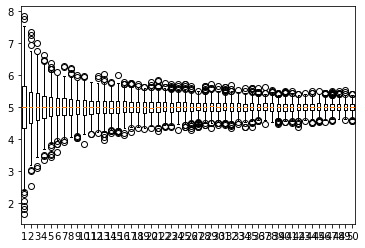

In [83]:
# Answer to 1b here
fig,ax = plt.subplots()

ax.boxplot(b)

plt.show()

The boxplot shows that as n increases, the sample mean gets closer to the true mean (5). The trends in the boxplot demonstrate a better trend in general view

#### 1c. For n=3, plot the histogram of the mean for the 1000 trials. Use the Kolmogorov-Smirnov test to see if this sample distribution is normal. (Hint: you may need to translate this to the standard normal distribution.) Report the sample mean and sample standard deviation, the p-value from the test, and whether you would reject the null hypothesis.

5.004840409897669
0.5117767068907559


KstestResult(statistic=0.018291314438727613, pvalue=0.8915002490706928)

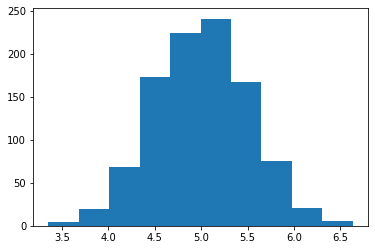

In [85]:
# Answer to 1c here
x = b[:,3]
plt.hist(x)

sample_mean = np.mean(x)
sample_stdev = np.std(x)
print(sample_mean)
print(sample_stdev)
z = zscore(x) #zscoring translate it to standard normal distribution
kstest(z,'norm')



Since p-value is greater than 0.5, then we would not reject the null hypothesis.

#### 1d. Repeat 1c but for n=20. What changes when the number of samples increases?

5.005081370515386
0.21558570242990704


KstestResult(statistic=0.021037283894061815, pvalue=0.7680143825957121)

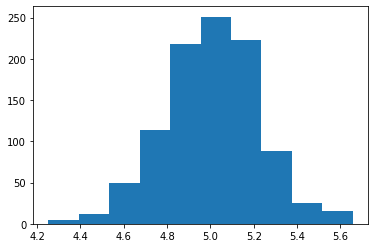

In [17]:
# Answer to 1d here
z = b[:,20]
plt.hist(z)
sample_mean = np.mean(z)
sample_stdev = np.std(z)
print(sample_mean)
print(sample_stdev)

t = zscore(z)
kstest(t,'norm')

As the number of samples increases, the sample standard deviation decreases

## (2) Now we will explore sampling from an alternate distribution type.

#### 2a. Sample the Pareto distribution (`np.random.pareto`) with parameter shape = 2, 1000 times. Plot the histogram of these values. Describe the shape of this histogram in words. Is it anything like the normal distribution?

(array([959.,  32.,   3.,   2.,   3.,   0.,   0.,   0.,   0.,   1.]),
 array([9.63624747e-04, 3.66950218e+00, 7.33804073e+00, 1.10065793e+01,
        1.46751178e+01, 1.83436564e+01, 2.20121949e+01, 2.56807335e+01,
        2.93492721e+01, 3.30178106e+01, 3.66863492e+01]),
 <a list of 10 Patch objects>)

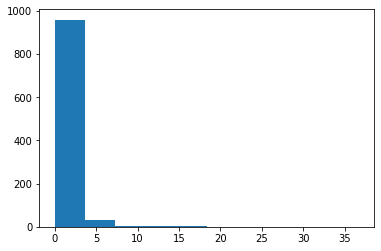

In [22]:
# Answer 2a here
a = np.random.pareto(2,1000)    
plt.hist(a)

The shape of this histogram is highly skewed, and it looks nothing like a normal distribution.

#### 2b. As in problem 1, plot a boxplot of the sample distribution from n=1:50. How does this differ from the plot in 1b and why? Plot the standard deviations of the sample means versus n. Is this any different?

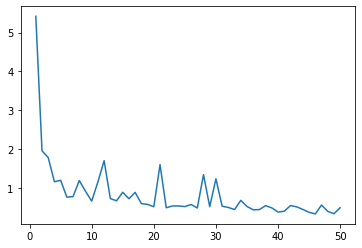

In [92]:
# Answer 2b here

b = np.zeros([1000,50])
sdev = np.zeros([50,1])
for n in range(0,50):    
    for i in range(0,1000):
        a = np.random.pareto(2,n+1) 
        b[i][n] = np.mean(a)
    sdev[n] = np.std(b[:,n]) #b is the sample mean

n = np.arange(1, 51)
plt.plot(n,sdev)

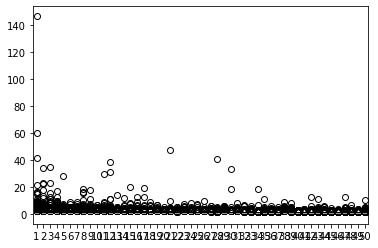

In [94]:
fig,ax = plt.subplots()
ax.boxplot(b)
plt.show()

The boxplot looks different because the boxplot gives us a nice visualization of the pareto distribution's mean. The trend is still the same, in a sense that the higher our n is, the less spread-out the boxplots are. It makes sense that it is centered around 0 because most of the data from out pareto distribution lies in 0 or lower values.

The standard deviations of the sample mean is different from what we had in problem 1.

### 2c. For n=3, plot the histogram of the sample means. What is this distribution, is it Pareto or normal? Report your test results.

(array([862., 101.,  20.,   9.,   4.,   1.,   2.,   0.,   0.,   1.]),
 array([ 0.05834109,  1.55727328,  3.05620546,  4.55513765,  6.05406983,
         7.55300202,  9.0519342 , 10.55086639, 12.04979857, 13.54873076,
        15.04766294]),
 <a list of 10 Patch objects>)

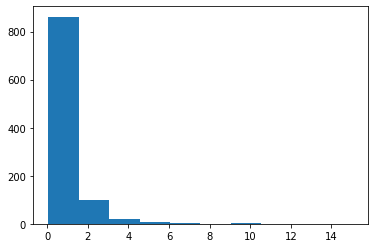

In [23]:
# Answer to 2c
plt.hist(b[:,3])

This looks like a pareto distribution.

#### 2d. Repeat 2b and 2c for n=100.

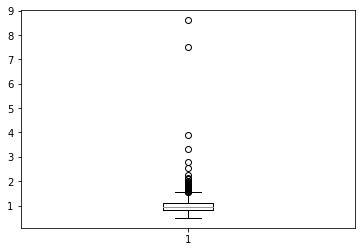

In [101]:
# Answer to 2d
b = np.zeros(1000)

for i in range(1000):
    a = np.random.pareto(2,100)
    b[i] = np.mean(a)

fig,ax = plt.subplots()
ax.boxplot(b)
plt.show()

## (3) Differential expression . In this problem you will use the two-sample t-test to explore what differential hypothesis testing looks like in known standards and how multiple hypothesis correction effects the number of false positives and negatives from these tests.
- Distribution 1, normal with mu=1, sigma=1
- Distribution 2, normal with mu=3, sigma=1

#### 3a. False Negative: Using n=3, perform 100 comparisons of distribution 1 versus distribution 2 with an alpha=0.05. Anytime you fail to reject the hypothesis it is a false negative. Why is this a false negative? Report the number of false negatives from your 100 tests.

Hint: It'd be helpful to define a function that does this for you at this point.

In [15]:
# Answer to 3a here.  False negative: didn't reject null, but we're takin from same distribution
def falseNegative(comp,n,alpha):
    falseNeg = 0
    for rep in range(comp):
        dist1 = np.random.normal(1,1,n)
        dist2 = np.random.normal(3,1,n)
        a = ttest_ind(dist2,dist1)
        if a.pvalue > alpha:
            falseNeg = falseNeg + 1

    return (falseNeg)

falseNegative(100,3,0.05)


58

This is a false negative because you are rejecting the hypothesis when you're supposed to fail to reject it

#### 3b. False Positives: Using n=3, perform 100 comparisons of distribution 1 versus distribution 1 with an alpha=0.05. Anytime you reject the hypothesis this is a false positive. Why is this a false positive? Report the number of false positives from your 100 tests.

In [14]:
# Answer to 3b here.
def falsePositive(comp,n,alpha):
    falsePos = 0
    for rep in range(1,comp):
        dist1 = np.random.normal(1,1,n)
        dist2 = np.random.normal(1,1,n)
        b = ttest_ind(dist1,dist2)
        if b.pvalue < alpha:
            falsePos = falsePos + 1
    return (falsePos)
    
falsePositive(100,3,0.05)


5

This is a false positive because we accept the hypothesis when we're not supposed to do so

#### 3c. Repeat 3b but 1000 times. What is the number of false positives? Predict the number of false positives you would get if you compared samples from the same distribution 10,000 times and explain why.

In [149]:
# Answer to 3c
falsePositive(1000,3,0.05)

53


The number of false positives for 10,000 times would be close to 10x the number of false positives if it's run 1,000 times. Because by doing the test 10 fold, we increase the probability of finding a false positive by 10 fold.

#### 3d. Now sweep n from 3 to 30 and report the number of false positives and false negatives for each n when you run 100 comparisons. (Provide this in a table format). Please explain the trend you see and interpret its meaning.

In [77]:
# Answer to 3d
#t = newTable("False Positives", 28, 2)
#t.setText(1,1,"N")
for n in range(3,31):
    print ('n = ',n)
    a = falsePositive(100,n,0.05)
    b = falseNegative(100,n,0.05)
    print ('False Positive = ', a)
    print ('False Negative = ', b)

n =  3
False Positive =  6
False Negative =  62
n =  4
False Positive =  6
False Negative =  30
n =  5
False Positive =  6
False Negative =  21
n =  6
False Positive =  3
False Negative =  11
n =  7
False Positive =  1
False Negative =  9
n =  8
False Positive =  4
False Negative =  2
n =  9
False Positive =  6
False Negative =  1
n =  10
False Positive =  6
False Negative =  1
n =  11
False Positive =  6
False Negative =  0
n =  12
False Positive =  4
False Negative =  0
n =  13
False Positive =  6
False Negative =  0
n =  14
False Positive =  6
False Negative =  0
n =  15
False Positive =  2
False Negative =  0
n =  16
False Positive =  4
False Negative =  0
n =  17
False Positive =  4
False Negative =  0
n =  18
False Positive =  4
False Negative =  0
n =  19
False Positive =  6
False Negative =  0
n =  20
False Positive =  3
False Negative =  0
n =  21
False Positive =  5
False Negative =  0
n =  22
False Positive =  6
False Negative =  0
n =  23
False Positive =  5
False Negative 

As n increases, the false negative decreases and the false positive fluctuates between 3 and 10. The number of false negative decreases because as we increase the number of n, we get a better understanding of the statistic and we decrease the type 2 error.

#### 3e. For n=3, suggest how the number of false negatives changes according to sigma for the two distributions and test this. Report your new values and sigma and the number of false negatives in 100 tests.

In [74]:
# Answer to 3e
def falseNegative2(comp,n,alpha,sigma):
    falseNeg = 0
    for rep in range(comp):
        dist1 = np.random.normal(1,sigma,n)
        dist2 = np.random.normal(3,sigma,n)
        a = ttest_ind(dist2,dist1)
        if a.pvalue > alpha:
            falseNeg = falseNeg + 1

    return (falseNeg)

a = falseNegative2(100,3,0.05,2)
b = falseNegative2(100,3,0.05,5)
print('False Negative for sigma = 2 is', a)
print('False Negative for sigma = 5 is', b)

False Negative for sigma = 2 is 77
False Negative for sigma = 5 is 90


As we increase the sigma, the number of false negatives increase.

#### 3f. Lastly, perform 3d for p < 0.01 instead of p < 0.05. How does this influence the rate of false positives and negatives? How might you use this when performing many tests?

In [78]:
# Answer to 3f
for n in range(3,31):
    print ('n = ' ,n)
    a = falsePositive(100,n,0.01)
    b = falseNegative(100,n,0.01)
    print ('False Positive = ', a)
    print ('False Negative = ', b)

n =  3
False Positive =  1
False Negative =  86
n =  4
False Positive =  1
False Negative =  72
n =  5
False Positive =  1
False Negative =  53
n =  6
False Positive =  1
False Negative =  35
n =  7
False Positive =  4
False Negative =  16
n =  8
False Positive =  5
False Negative =  16
n =  9
False Positive =  1
False Negative =  8
n =  10
False Positive =  1
False Negative =  8
n =  11
False Positive =  1
False Negative =  8
n =  12
False Positive =  0
False Negative =  2
n =  13
False Positive =  3
False Negative =  4
n =  14
False Positive =  0
False Negative =  1
n =  15
False Positive =  1
False Negative =  0
n =  16
False Positive =  0
False Negative =  0
n =  17
False Positive =  0
False Negative =  0
n =  18
False Positive =  0
False Negative =  0
n =  19
False Positive =  0
False Negative =  0
n =  20
False Positive =  0
False Negative =  0
n =  21
False Positive =  0
False Negative =  0
n =  22
False Positive =  0
False Negative =  0
n =  23
False Positive =  0
False Negativ

The false positive generally decreases compared to the previous case, and the false negative also begins higher although it will decrease back to zero. By decreasing the alpha, we decrease the type-I error by giving it a smaller range to reject the null hypothesis.

## (4) Shaffer et al

In this excercise we're going to explore some basic concepts of statistics, and use them to build up to some more advanced ideas. To examine these ideas we're going to consider a classic of molecular biology—the [Luria-Delbrück experiment](https://en.wikipedia.org/wiki/Luria–Delbrück_experiment).

In [29]:
repOne = np.array([259, 213, 182, 167, 254, 221, 236, 168, 190, 262, 285, 158, 240, 187, 326, 116, 220, 309, 181, 268, 285, 467, 121, 177, 188, 116, 218, 195, 260, 307, 213, 314, 220, 245, 325, 220, 222, 336, 60, 268, 252, 112, 252])
repTwo = np.array([28, 72, 53, 103, 46, 90, 105, 78, 86, 127, 30, 52, 105, 111, 88, 35, 23, 119, 89, 110, 138, 79, 118, 107, 38, 71, 104, 61, 125])

#### 4a. First, we need to build up a distribution of outcomes for what an experiment would look like if it followed the Luria-Delbruck process.
Fill in the function below keeping track of normal and mutant cells. Then, make a second function, `CVofNRuns`, that runs the experiment 3000 times. You can assume a culture size of 120000 cells, and mutation rate of 0.0001 per cell per generation. What does the distribution of outcomes look like?

(array([2.966e+03, 1.900e+01, 6.000e+00, 0.000e+00, 1.000e+00, 6.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([2.0000e+00, 8.2660e+02, 1.6512e+03, 2.4758e+03, 3.3004e+03,
        4.1250e+03, 4.9496e+03, 5.7742e+03, 6.5988e+03, 7.4234e+03,
        8.2480e+03]),
 <a list of 10 Patch objects>)

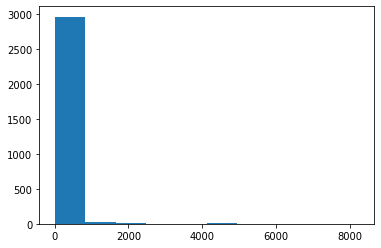

In [38]:
# Runs the simulation a bunch of times, and looks for how often the fano (cv/mean) comes out to one side

def simLuriaDelbruck(cultureSize, mutationRate):
    nCells, nMuts = 1, 0  # Start with 1 non-resistant cell

    for _ in range(np.int(np.floor(np.log2(cultureSize)))):  # num of gens
        nCells = 2*nCells     # Double the number of cells, simulating division
        newMuts = np.random.poisson(nCells * mutationRate)  # de novo
        nMuts = 2*nMuts + newMuts       # Previous mutants divide and add
        nCells = nCells - newMuts      # Non-resistant pop goes down by newMuts

    return nMuts


def CVofNRuns():
    result = np.zeros(3000)
    for i in range(0,3000):
        result[i] = simLuriaDelbruck(120000,0.0001)
    return result

y = CVofNRuns()
n = np.arange(1,3001)
plt.hist(y)

#The distribution of outcomes looks like a skewed normal distribution

#### 4b. Compare the distribution of outcomes between the two replicates of the experiment using the 2-sample KS test. Are they consistent with one another?
Hint: Each experiment varies slightly in the amount of time it was run. The absolute values of the numbers doesn't matter, so much as the variation of them. You'll need to correct for this by dividing by the mean of the results.

In [39]:
# Answer to 4b
mean1 = np.mean(repOne)
mean2 = np.mean(repTwo)
repOneFix = np.zeros(len(repOne))
repTwoFix = np.zeros(len(repTwo))

for i in range(len(repOne)):
    repOneFix[i] = repOne[i] / mean1

for i in range(len(repTwo)):
    repTwoFix[i] = repTwo[i] / mean2

ks_2samp(repOneFix, repTwoFix)

Ks_2sampResult(statistic=0.25100240577385724, pvalue=0.17846555487320548)

The two reps are consistent with one another because p-value > 0.05

#### 4c. Compare the distribution of outcomes between the experiment and model. Are our results consistent with resistance arising through a Luria-Delbruck related process?

In [40]:
# Answer to 4c
a = CVofNRuns()
b = repTwoFix
ks_2samp(a,b)

Ks_2sampResult(statistic=1.0, pvalue=2.7755575615628914e-15)

The results are inconsistent because p-value < 0.05

#### 4d. We assumed a specific mutation rate and final number of cells. How might you show whether or not these parameters influence our results?

We may assign random values to the mutation rate and final number of cells (instead of assigning a known one) and do another ks_2samp test between the 'randomly-generated mutation rate and final number of cells' and the assigned one to check if the 2 results are consistent